<a href="https://colab.research.google.com/github/madhavnkb123/MLCode1/blob/main/Python_Practice_Session.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import board
import busio
from digitalio import DigitalInOut, Direction
import adafruit_fingerprint

led = DigitalInOut(board.D13)
led.direction = Direction.OUTPUT

uart = busio.UART(board.TX, board.RX, baudrate=57600)

# If using with a computer such as Linux/RaspberryPi, Mac, Windows with USB/serial converter:
# import serial
# uart = serial.Serial("/dev/ttyUSB0", baudrate=57600, timeout=1)

# If using with Linux/Raspberry Pi and hardware UART:
# import serial
# uart = serial.Serial("/dev/ttyS0", baudrate=57600, timeout=1)

finger = adafruit_fingerprint.Adafruit_Fingerprint(uart)

##################################################


def get_fingerprint():
    """Get a finger print image, template it, and see if it matches!"""
    print("Waiting for image...")
    while finger.get_image() != adafruit_fingerprint.OK:
        pass
    print("Templating...")
    if finger.image_2_tz(1) != adafruit_fingerprint.OK:
        return False
    print("Searching...")
    if finger.finger_search() != adafruit_fingerprint.OK:
        return False
    return True


# pylint: disable=too-many-branches
def get_fingerprint_detail():
    """Get a finger print image, template it, and see if it matches!
    This time, print out each error instead of just returning on failure"""
    print("Getting image...", end="")
    i = finger.get_image()
    if i == adafruit_fingerprint.OK:
        print("Image taken")
    else:
        if i == adafruit_fingerprint.NOFINGER:
            print("No finger detected")
        elif i == adafruit_fingerprint.IMAGEFAIL:
            print("Imaging error")
        else:
            print("Other error")
        return False

    print("Templating...", end="")
    i = finger.image_2_tz(1)
    if i == adafruit_fingerprint.OK:
        print("Templated")
    else:
        if i == adafruit_fingerprint.IMAGEMESS:
            print("Image too messy")
        elif i == adafruit_fingerprint.FEATUREFAIL:
            print("Could not identify features")
        elif i == adafruit_fingerprint.INVALIDIMAGE:
            print("Image invalid")
        else:
            print("Other error")
        return False

    print("Searching...", end="")
    i = finger.finger_fast_search()
    # pylint: disable=no-else-return
    # This block needs to be refactored when it can be tested.
    if i == adafruit_fingerprint.OK:
        print("Found fingerprint!")
        return True
    else:
        if i == adafruit_fingerprint.NOTFOUND:
            print("No match found")
        else:
            print("Other error")
        return False


# pylint: disable=too-many-statements
def enroll_finger(location):
    """Take a 2 finger images and template it, then store in 'location'"""
    for fingerimg in range(1, 3):
        if fingerimg == 1:
            print("Place finger on sensor...", end="")
        else:
            print("Place same finger again...", end="")

        while True:
            i = finger.get_image()
            if i == adafruit_fingerprint.OK:
                print("Image taken")
                break
            if i == adafruit_fingerprint.NOFINGER:
                print(".", end="")
            elif i == adafruit_fingerprint.IMAGEFAIL:
                print("Imaging error")
                return False
            else:
                print("Other error")
                return False

        print("Templating...", end="")
        i = finger.image_2_tz(fingerimg)
        if i == adafruit_fingerprint.OK:
            print("Templated")
        else:
            if i == adafruit_fingerprint.IMAGEMESS:
                print("Image too messy")
            elif i == adafruit_fingerprint.FEATUREFAIL:
                print("Could not identify features")
            elif i == adafruit_fingerprint.INVALIDIMAGE:
                print("Image invalid")
            else:
                print("Other error")
            return False

        if fingerimg == 1:
            print("Remove finger")
            time.sleep(1)
            while i != adafruit_fingerprint.NOFINGER:
                i = finger.get_image()

    print("Creating model...", end="")
    i = finger.create_model()
    if i == adafruit_fingerprint.OK:
        print("Created")
    else:
        if i == adafruit_fingerprint.ENROLLMISMATCH:
            print("Prints did not match")
        else:
            print("Other error")
        return False

    print("Storing model #%d..." % location, end="")
    i = finger.store_model(location)
    if i == adafruit_fingerprint.OK:
        print("Stored")
    else:
        if i == adafruit_fingerprint.BADLOCATION:
            print("Bad storage location")
        elif i == adafruit_fingerprint.FLASHERR:
            print("Flash storage error")
        else:
            print("Other error")
        return False

    return True


##################################################


def get_num():
    """Use input() to get a valid number from 1 to 127. Retry till success!"""
    i = 0
    while (i > 127) or (i < 1):
        try:
            i = int(input("Enter ID # from 1-127: "))
        except ValueError:
            pass
    return i


while True:
    print("----------------")
    if finger.read_templates() != adafruit_fingerprint.OK:
        raise RuntimeError("Failed to read templates")
    print("Fingerprint templates:", finger.templates)
    print("e) enroll print")
    print("f) find print")
    print("d) delete print")
    print("----------------")
    c = input("> ")

    if c == "e":
        enroll_finger(get_num())
    if c == "f":
        if get_fingerprint():
            print("Detected #", finger.finger_id, "with confidence", finger.confidence)
        else:
            print("Finger not found")
    if c == "d":
        if finger.delete_model(get_num()) == adafruit_fingerprint.OK:
            print("Deleted!")
        else:
            print("Failed to delete")

ModuleNotFoundError: ignored

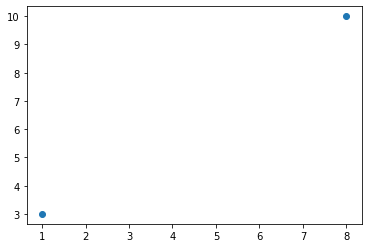

In [2]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([1, 8])
ypoints = np.array([3, 10])

plt.plot(xpoints, ypoints, 'o')
plt.show()

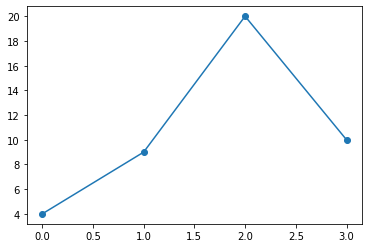

In [4]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([4, 9, 20, 10])

plt.plot(ypoints, marker = 'o')
plt.show()

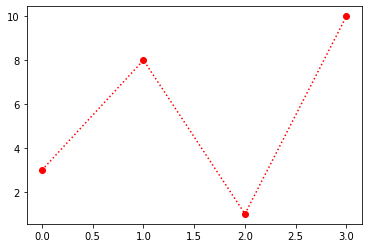

In [5]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, 'o:r')
plt.show()

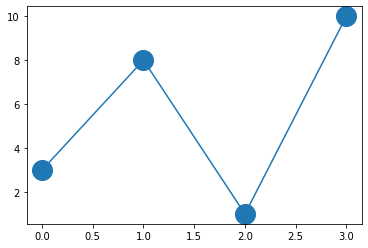

In [6]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o', ms = 20)
plt.show()

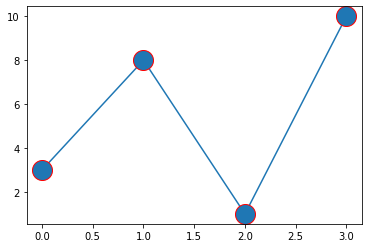

In [7]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o', ms = 20, mec = 'r')
plt.show()

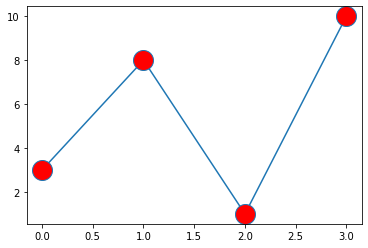

In [8]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, marker = 'o', ms = 20, mfc = 'r')
plt.show()

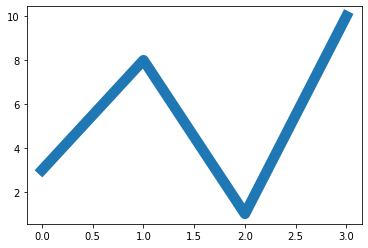

In [17]:
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([3, 8, 1, 10])

plt.plot(ypoints, linestyle = '-',linewidth = '10.5')
plt.show()

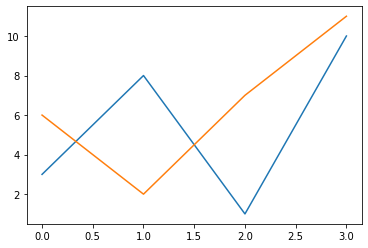

In [19]:
import matplotlib.pyplot as plt
import numpy as np
y1 = np.array([3, 8, 1, 10])
y2 = np.array([6, 2, 7, 11])
plt.plot(y1)
plt.plot(y2)
plt.show()

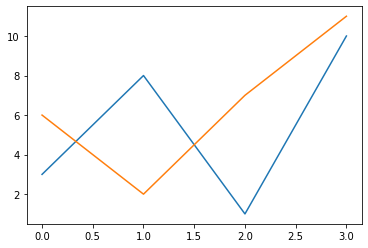

In [20]:
import matplotlib.pyplot as plt
import numpy as np
x1 = np.array([0, 1, 2, 3])
y1 = np.array([3, 8, 1, 10])
x2 = np.array([0, 1, 2, 3])
y2 = np.array([6, 2, 7, 11])
plt.plot(x1, y1, x2, y2)
plt.show()

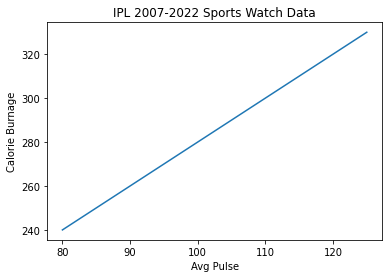

In [26]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

plt.plot(x, y)
plt.title("IPL 2007-2022 Sports Watch Data")
plt.xlabel("Avg Pulse")
plt.ylabel("Calorie Burnage")

plt.show()

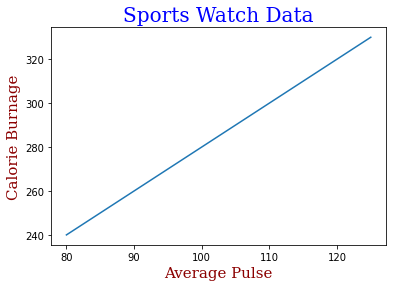

In [27]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([80, 85, 90, 95, 100, 105, 110, 115, 120, 125])
y = np.array([240, 250, 260, 270, 280, 290, 300, 310, 320, 330])

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Sports Watch Data", fontdict = font1)
plt.xlabel("Average Pulse", fontdict = font2)
plt.ylabel("Calorie Burnage", fontdict = font2)

plt.plot(x, y)
plt.show()

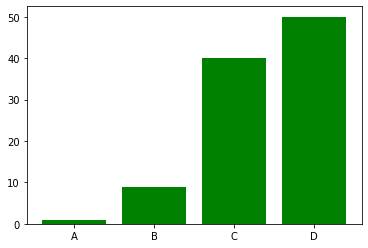

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["A", "B", "C", "D"])
y = np.array([1, 9, 40, 50])


plt.bar(x, y, color = "green")
plt.show()

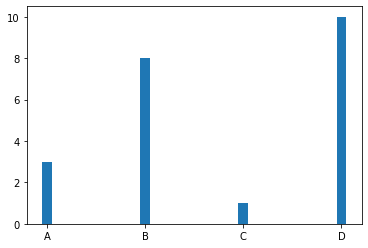

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.bar(x, y, width = 0.1)
plt.show()

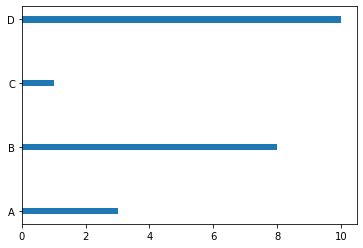

In [34]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["A", "B", "C", "D"])
y = np.array([3, 8, 1, 10])

plt.barh(x, y, height = 0.1)
plt.show()

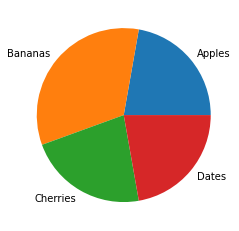

In [40]:
import matplotlib.pyplot as plt
import numpy as np
mylabels = ["Apples", "Bananas", "Cherries", "Dates"]
y = np.array([40, 60, 40, 40])

plt.pie(y,labels = mylabels)
plt.show() 

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [ ]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Newspaper", size="Newspaper", trendline="ols")
figure.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
figure = px.scatter(data_frame = data, x="Sales",
                    y="TV", size="TV", trendline="ols")
figure.show()

In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=730)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('BTC-USD', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.head())

ModuleNotFoundError: ignored

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Bitcoin Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

KeyError: ignored

In [ ]:
correlation = data.corr()
print(correlation["Sales"].sort_values(ascending=False))

Sales        1.000000
TV           0.901208
Radio        0.349631
Newspaper    0.157960
Name: Sales, dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

data = pd.read_csv("tips.csv")
print(data.head())

FileNotFoundError: ignored

In [ ]:
def myfun(b=10, c=4, d="hello"):
  return b + c

myfun()


14

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/flipkart_reviews.csv")
print(data.head())

                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [ ]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=5000)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

data = yf.download('NFLX', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
print(data.tail())

ModuleNotFoundError: ignored

In [ ]:
print(data.isnull().sum())

Product_name    0
Review          0
Rating          0
dtype: int64


In [ ]:
figure = px.scatter(data_frame = data, x="Sales",
                    y="Radio", size="Radio", trendline="ols")
figure.show()

ValueError: ignored

In [ ]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values

import plotly.express as px
figure = px.pie(data, 
             values=quantity, 
             names=numbers,hole = 0.5)
figure.show()

In [ ]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=data["Date"],
                                        open=data["Open"], 
                                        high=data["High"],
                                        low=data["Low"], 
                                        close=data["Close"])])
figure.update_layout(title = "Netflix Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

KeyError: ignored

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
def square(x): 
  return x*x
def applier(q, x): 
  return q(x)
applier(square, 7)

49

In [ ]:
f = lambda x,y,z : 5 * x * y * z
f
f(3, 4, 2)

60

In [ ]:
f = lambda x,y,z : (5 * x * y ) ** z
f
f(2, 2, 2)

400

In [ ]:
def add1(x): 
  return x+1
map(add1, [1,2,3,4])

In [ ]:
map(lambda x: x+1, [1,2,3,4])

In [ ]:
map(+, [1,2,3,4], [100,200,300,400])

SyntaxError: ignored

In [ ]:
reduce(add, [1,2,3,4])

NameError: ignored

In [ ]:
filter(odd, [1,2,3,4])

NameError: ignored

In [ ]:
def fahrenheit(T):
    return ((float(9)/5)*T + 32)
def celsius(T):
    return (float(5)/9)*(T-32)
temp = (36.5, 37, 37.5,39)
F = map(fahrenheit, temp)
C = map(celsius, F)


In [ ]:
Celsius = [40,39.2, 36.5, 37.3, 37.8]
Fahrenheit = map(lambda x: (float(9)/5)*x + 32, Celsius)
print (Fahrenheit)


In [ ]:
for item in movies:
  print ('-----------')
  for key in keys:
    print (key,': ', item[key])
print('-----------') 

NameError: ignored

In [ ]:
class Student:          #class creation
  x = 0
  def party(self) :
    self.x = self.x + 1
    print ("Hi how are you",self.x) 
nkb = Student()         #object creation 
nkb.party()             #function calling  
nkb.party()             #function calling  
nkb.party()

Hi how are you 1
Hi how are you 2
Hi how are you 3


In [ ]:
class Student:          #class creation
  x = 0
  def __init__(self):
    print ("I am constructed",self.x)
  def party(self) :
    self.x = self.x + 1
    print ("Hi how are you",self.x)
  def __del__(self):
    print ("I am destructed",self.x)  
nkb = Student()         #object creation 
nkb2= Student()
nkb.party()             #function calling  
nkb.party()             #function calling  
nkb.party()

I am constructed 0
I am constructed 0
Hi how are you 1
Hi how are you 2
Hi how are you 3
I am destructed 3


In [ ]:
class PartyAnimal:
  x = 0
  name = ""
  def __init__(self, name1):
    self.name = name1
    print (self.name,"constructed")
  def party(self) :
    self.x = self.x + 1
    print (self.name,"party count",self.x)
s = PartyAnimal("virat")
s.party()
j = PartyAnimal("sachin")
j.party()
s.party()
s.party()
s.party()

virat constructed
virat party count 1
sachin constructed
sachin party count 1
virat party count 2
virat party count 3
virat party count 4


In [ ]:
class PartyAnimal:
x = 0
name = ""
def __init__(self, nam):
self.name = nam
print self.name,"constructed"
def party(self) :
self.x = self.x + 1
print self.name,"party count",self.x
s = PartyAnimal("Sally")
s.party()
j = PartyAnimal("Jim")
j.party()
s.party()

In [ ]:
class PartyAnimal:
  x = 0
 def party(self):
  self.x = self.x + 1
  print ("So far",self.x)
an = PartyAnimal()
an.party()
an.party()
an.party()

IndentationError: ignored

In [ ]:
def myfun(x, y):
  return x * y
myfun(3, 4)

12

In [ ]:
fruit = 'Ginger'
letter = fruit[1]
print (letter)

i


In [ ]:
x = 3
w = fruit[x - 1]
print (w)
print(len(fruit))

n
6


In [ ]:
fruit = 'banana'
index = 0
while index < len(fruit):
  letter = fruit[index]
  print (index, letter) 
  index = index + 1

0 b
1 a
2 n
3 a
4 n
5 a


In [ ]:
fruit = 'banana'
for letter in fruit:
  print (letter)

b
a
n
a
n
a


In [ ]:
word = 'banana'
count = 0
for letter in word :
  if letter == 'a' :
    count = count + 1
    print (count)

1
2
3


In [ ]:
s = 'Monty Python'
print (s[:5])

Monty


In [ ]:
print (s[:])

Monty Python


In [ ]:
fruit = 'banana'
>>> 'n' in fruit

In [ ]:
a = 'Hello'
b = a + 'There'
print (b)
c = a + ' ' + 'There'
print (c)


HelloThere
Hello There


In [ ]:
greet = 'Hello Bob'
zap = greet.lower()
print(zap)
zap=greet.upper()
print(zap)

hello bob
HELLO BOB


In [ ]:
stuff = 'Hello world'
type(stuff)
dir(stuff)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmod__',
 '__rmul__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'capitalize',
 'casefold',
 'center',
 'count',
 'encode',
 'endswith',
 'expandtabs',
 'find',
 'format',
 'format_map',
 'index',
 'isalnum',
 'isalpha',
 'isascii',
 'isdecimal',
 'isdigit',
 'isidentifier',
 'islower',
 'isnumeric',
 'isprintable',
 'isspace',
 'istitle',
 'isupper',
 'join',
 'ljust',
 'lower',
 'lstrip',
 'maketrans',
 'partition',
 'replace',
 'rfind',
 'rindex',
 'rjust',
 'rpartition',
 'rsplit',
 'rstrip',
 'split',
 'splitlines',
 'startswith',
 'strip',
 'swapcase',
 'title',
 'translate',
 'upper',


In [ ]:
fruit = 'banana'
pos = fruit.find('na')
print (pos)

2


In [ ]:
greet = 'Hello Bob'
nstr = greet.replace('Bob','Jane')
print (nstr)

Hello Jane


In [ ]:
data = 'From stephen.marquard@uct.ac.za Sat Jan 5 09:14:16 2008'
atpos = data.find('@')
print (atpos)

21


In [ ]:
line = 'Please have a nice day'
line.startswith('Please')

True

In [ ]:
data = 'From stephen.marquard@gmail.com Sat Jan 5 09:14:16 2008'
atpos = data.find('@')
print (atpos)
sppos = data.find(' ',atpos)
print (sppos)
host = data[atpos+1 : sppos]
print (host)

21
31
gmail.com


In [ ]:
print ([1, 24, 76])

[1, 24, 76]


In [ ]:
print (['red', 'yellow', 'blue'])
print (['red', 24, 98.6])

['red', 'yellow', 'blue']
['red', 24, 98.6]


In [ ]:
for i in [5, 4, 3, 2, 1] :
  print (i)
print ('Blastoff!')

5
4
3
2
1
Blastoff!


In [ ]:
friends = [ 'Joseph', 'Glenn', 'Sally' ]
print (friends[1])

Glenn


In [ ]:
x = [ 1, 2, 'joe', 99]
print (len(x))

4


In [ ]:
t = [9, 41, 12, 3, 74, 15]
t[1:3]

[41, 12]

In [ ]:
x = list()
type(x)
dir(x)

['__add__',
 '__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__rmul__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'append',
 'clear',
 'copy',
 'count',
 'extend',
 'index',
 'insert',
 'pop',
 'remove',
 'reverse',
 'sort']

In [ ]:
stuff = list()
stuff.append('book')
stuff.append(99)
print (stuff)
stuff.append('cookie')
print(stuff)

['book', 99]
['book', 99, 'cookie']


In [ ]:
some = [1, 9, 21, 10, 16]
9 in some
20 not in some

True

In [ ]:
friends = [ 'Joseph', 'Glenn', 'Sally' ,'joseph']
friends.sort()
print (friends)


['Glenn', 'Joseph', 'Sally', 'joseph']


In [ ]:
nums = [3, 41, 12, 9, 74, 15]
print (len(nums))

6


In [ ]:
print (sum(nums)/len(nums))


25.666666666666668


In [ ]:
abc = 'With three words'
stuff = abc.split()
print (stuff)


['With', 'three', 'words']


In [ ]:
line = "From stephen.marquard@gmail.com" 
words = line.split()
email = words[1]
pieces = email.split('@')
print (pieces[1])


gmail.com


In [ ]:
lst = list()
lst.append(21)
lst.append(183)
print (lst)
lst[0] = 23

[21, 183]


In [ ]:
ddd = dict()
ddd['age'] = 21
ddd['course'] = 182
print (ddd)


{'age': 21, 'course': 182}


In [ ]:
jjj = { 'chuck' : 1 , 'fred' : 42, 'jan': 100}
print(jjj)


{'chuck': 1, 'fred': 42, 'jan': 100}


In [ ]:
print (max(nums))
print (min(nums))

74
3


In [ ]:
x = 42
if x > 1 :
  print ('More than one')
if x < 100 :
  print ('Less than 100')
print ('All done')

More than one
Less than 100
All done


In [ ]:
rawstr = input('Enter a number:')
try:
  ival = int(rawstr)
except:
  ival = -1


if ival > 0 :
  print ('you entered number')
else:
  print ('Not a number')

Enter a number:9823
you entered number


In [ ]:
x=5
y=7
print(x+y)

12


In [ ]:
import numpy

speed = [86,87,88,86,87,85,86]

x = numpy.std(speed)

print(x)


0.9035079029052513


In [ ]:
x=input("Enter value of x:")
y=int(input("Enter value of y:"))
sum=x+y
print("the sum of two integers=",sum)
